In [2]:
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

Preprocess the data

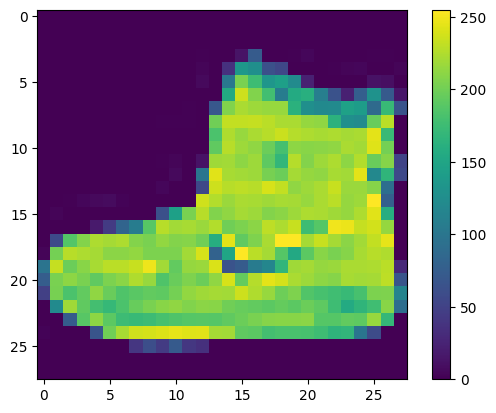

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Display the first few images of the training set

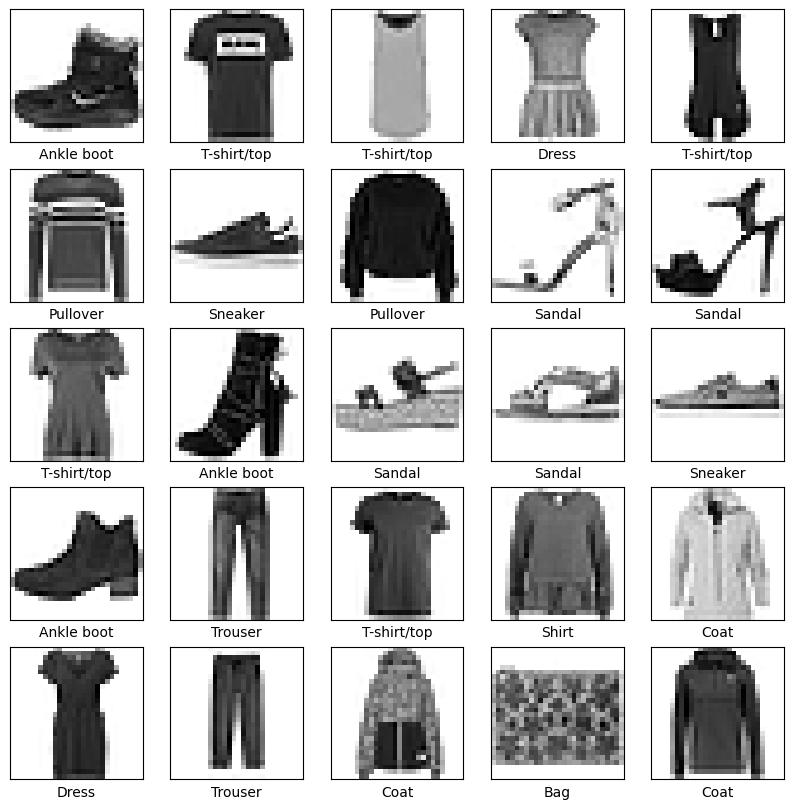

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Setting up keras layers

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
])

Compiling the model

In [9]:
model.compile(optimizer = 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

Training the model

In [10]:
#fitting the model
model.fit(train_images, train_labels,epochs=10)

#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels,verbose = 2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5052 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3827 - accuracy: 0.8624
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3426 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3185 - accuracy: 0.8829
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2996 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2842 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2737 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2637 - accuracy: 0.9012
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2534 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.24

In [11]:
#Make predictions
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.3267908e-07, 4.4586997e-08, 5.8805583e-08, 4.0076782e-11,
       6.0895298e-09, 5.3609395e-03, 1.3905536e-06, 1.3126132e-02,
       4.0907917e-08, 9.8151124e-01], dtype=float32)

In [12]:
np.argmax(predictions[0])

9

In [13]:
test_labels[0]

9

In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

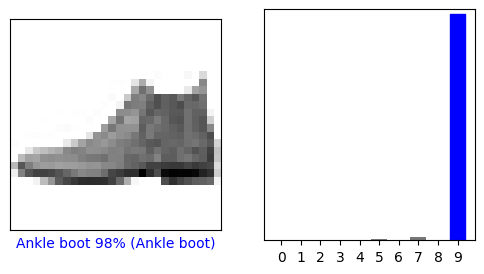

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)

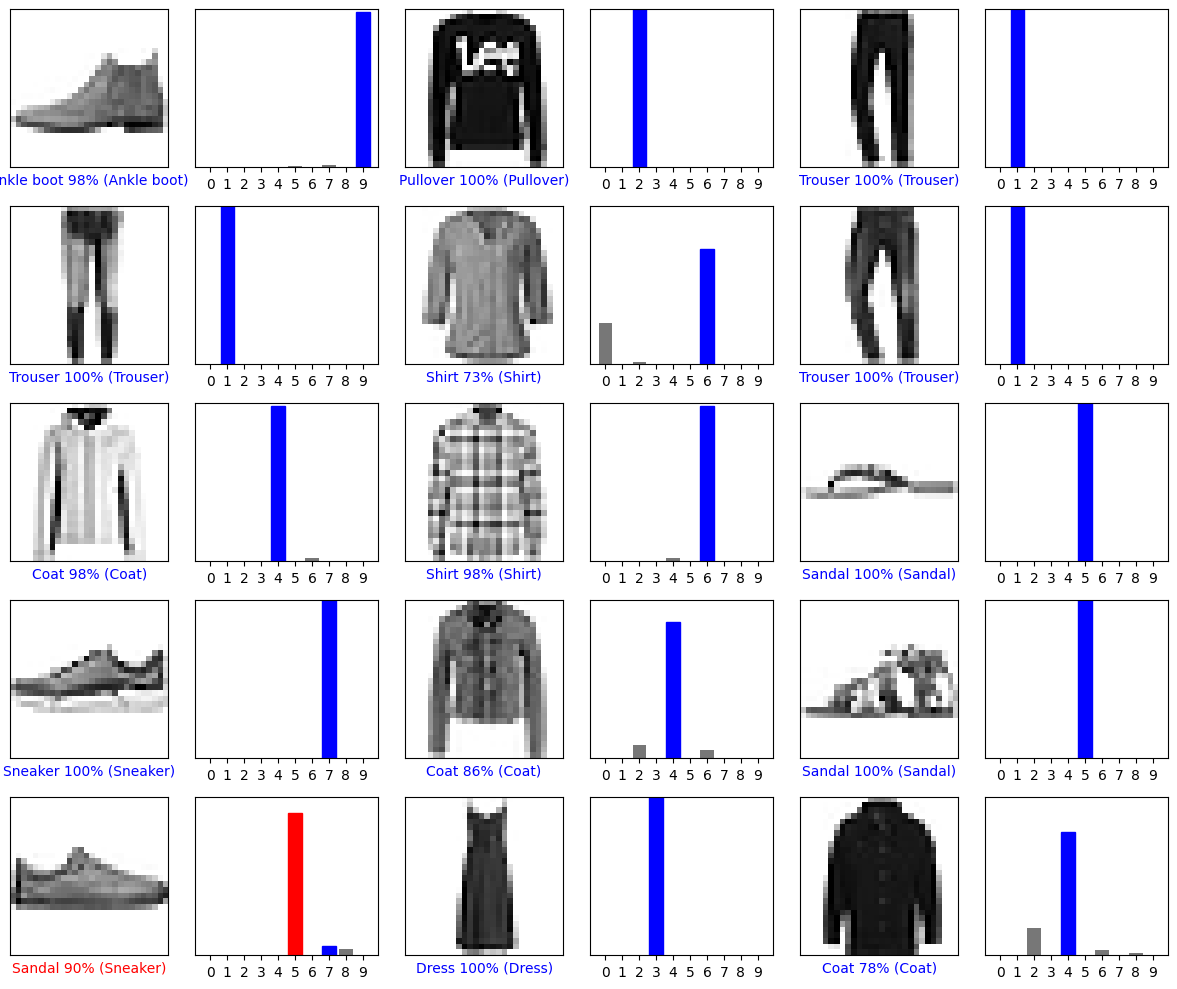

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()